In [1]:
#This Project is about predicting human activity. I have just added something now. I will commit it now
#Another change on github


#INTRODUCTION
#Object Oriented Programming has become an extremely useful technique especially with increasing
#complexity of procedural programming. “It is an approach to software development in which the structure of the software 
#is based on objects interacting with each other to accomplish a task. 

#For a background study of the project, please click this link:
# https://docs.google.com/document/d/1tfMkI7tYEwycqnVuq2Em8S5gQuK-URGnJVLx8eLLYYA/edit


# To fully understand this project, it is important to understand the meaning of some key terms.

#1. Machine Learning
# Arthur Samuel (1959). Machine Learning (ML): Field of study that gives computers the ability to learn without being
# explicitly programmed. 

#2. Model: A model is a mathematical relationship that connects two or more variables

#3. Fitting the model
#Thismeans finding the values of the unknown coefficients or constants of the equation or the model
# This process of fitting the model based on the input data is known as training

In [2]:
# REFERENCE FOR CODES

# Please visit https://scikit-learn.org for some of the standard codes used for the development of the project. Some of them
# have been presented below:

#STANDARD SCALER
#  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

#Importance of feature scaling
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

#Receiver Operating Characteristic (ROC)
#ROC for both binary and multi-label classification
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

#Statistical comparison of models using grid search
#Comparing to select the best of the different models of SVM
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py

#MODEL SELECTION USING CROSS VALIDATION
#
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [3]:
#Note:
#pandas.get_dummies() will onvert categorical variable into dummy/indicator variables.
#Pandas pd.get_dummies() will turn your categorical column (column of labels) into indicator columns (columns of 0s and 1s).

#This function is heavily used within machine learning algorithms. For instance, random forrest doesn't do great with columns 
#that have labels. It's best to turn these into dummy indicator columns.
#https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/ML0101EN/ML0101EN-Clas-Decision-Trees-drug-py-v1.ipynb?lti=true
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [4]:
# Lets begin!

In [5]:
#import relevant packages and modules

import pandas as pd
import pandas as pd
import numpy as np                  

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score                         

#CLASSIFIER COMPARISON FROM SCIKIT LEARN.ORG
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html?highlight=nearest


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
!pip install imbalanced-learn


#DecisionTreeClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier



#RANDOM FOREST CLASSIFIER FROM SCIKIT LEARN.ORG
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X, y)
#print(clf.predict([[0, 0, 0, 0]]))


#SUPPORT VECTOR MACHINE FROM SCIKIT LEARN.ORG
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#from sklearn.svm import SVC
#clf=SVC()           
#clf.fit(X, y)
#clf.predict(X, y)
#Alternatively, we can say
#from sklearn.svm import svm
#model = svm.SCV()


#K NEAREST NEIGHBOURS FROM FROM SCIKIT LEARN.ORG
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X, y)
# print(neigh.predict([[1.1]]))


#FROM SCIKIT LEARN.ORG
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
# >>> from sklearn.datasets import make_classification
# >>> from sklearn.model_selection import train_test_split
# >>> X, y = make_classification(n_samples=100, random_state=1)
# >>> X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
# ...                                                     random_state=1)
# >>> clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# >>> clf.predict_proba(X_test[:1])
# array([[0.038..., 0.961...]])
# >>> clf.predict(X_test[:5, :])
# array([1, 0, 1, 0, 1])
# >>> clf.score(X_test, y_test)
# 0.8...

In [13]:
#Lets explore the data. First, lets check the distribution of the classes in the target variable

#Import/load the dataset
activity_data=pd.read_csv('activity_context_tracking_data.csv')
activity_data

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205516,205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205517,205518,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205518,205519,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,DescendingStairs


In [14]:
#Lets extract the features and the target variable column from the dataframe

X = activity_data.iloc[:,:-1]        #all the records except the last one
y = activity_data.activity            #only the last record
X.head()

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.68151,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.68151,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.68151,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53


In [15]:
y

0                  Sitting
1                  Sitting
2                  Sitting
3                  Sitting
4                  Sitting
                ...       
205515    DescendingStairs
205516    DescendingStairs
205517    DescendingStairs
205518    DescendingStairs
205519    DescendingStairs
Name: activity, Length: 205520, dtype: object

In [16]:
#Lets see only the first few values
y.head()

0    Sitting
1    Sitting
2    Sitting
3    Sitting
4    Sitting
Name: activity, dtype: object

In [17]:
#Lets see the dimension of the dataset
activity_data.shape

(205520, 19)

In [18]:
#Lets see the list and character type of the features
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205520 entries, 0 to 205519
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _id         205520 non-null  int64  
 1   orX         205520 non-null  int64  
 2   orY         205520 non-null  int64  
 3   orZ         205520 non-null  int64  
 4   rX          205520 non-null  float64
 5   rY          205520 non-null  float64
 6   rZ          205520 non-null  float64
 7   accX        205520 non-null  float64
 8   accY        205520 non-null  float64
 9   accZ        205520 non-null  float64
 10  gX          205520 non-null  float64
 11  gY          205520 non-null  float64
 12  gZ          205520 non-null  float64
 13  mX          205520 non-null  float64
 14  mY          205520 non-null  float64
 15  mZ          205520 non-null  float64
 16  lux         205520 non-null  int64  
 17  soundLevel  205520 non-null  float64
 18  activity    205520 non-null  object 
dtypes:

In [19]:
#From the view, we can see that there are there are about 5 whole number sata and 12 columns with decimal fraction 

Text(0.5, 1.0, 'orY vs activity')

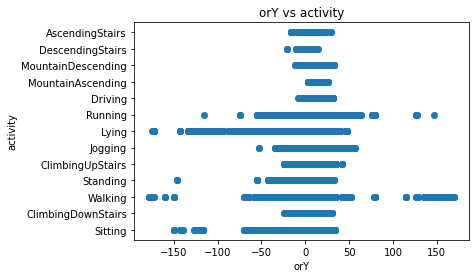

In [11]:
#Lets see the distribution of the  orY class

plt.scatter(activity_data['orY'],activity_data['activity'])
plt.xlabel('orY')
plt.ylabel('activity')
plt.title('orY vs activity')

Text(0.5, 1.0, 'orX vs activity')

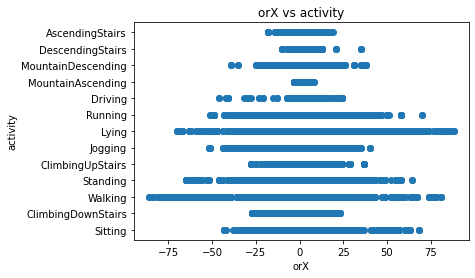

In [9]:
#Lets see the distribution of another clas, the  orzclass

plt.scatter(activity_data['orZ'],activity_data['activity'])
plt.xlabel('orX')
plt.ylabel('activity')
plt.title('orX vs activity')

In [13]:
# Let's check if we have missing values
activity_data.isnull().sum()

#Another way of checking if we have missing values is by using .... 

_id           0
orX           0
orY           0
orZ           0
rX            0
rY            0
rZ            0
accX          0
accY          0
accZ          0
gX            0
gY            0
gZ            0
mX            0
mY            0
mZ            0
lux           0
soundLevel    0
activity      0
dtype: int64

In [ ]:
#From  the  result, we can see that there are no missing values

In [14]:
#Numerical check of the distribution of the activity variable
activity_data.activity.value_counts()

#Oh! there there is class imbalance!!.

Sitting               75733
Walking               64507
Lying                 25440
Standing              19920
ClimbingUpStairs       5520
Jogging                5160
ClimbingDownStairs     3720
AscendingStairs        1800
Running                1200
Driving                 840
MountainDescending      840
DescendingStairs        720
MountainAscending       120
Name: activity, dtype: int64

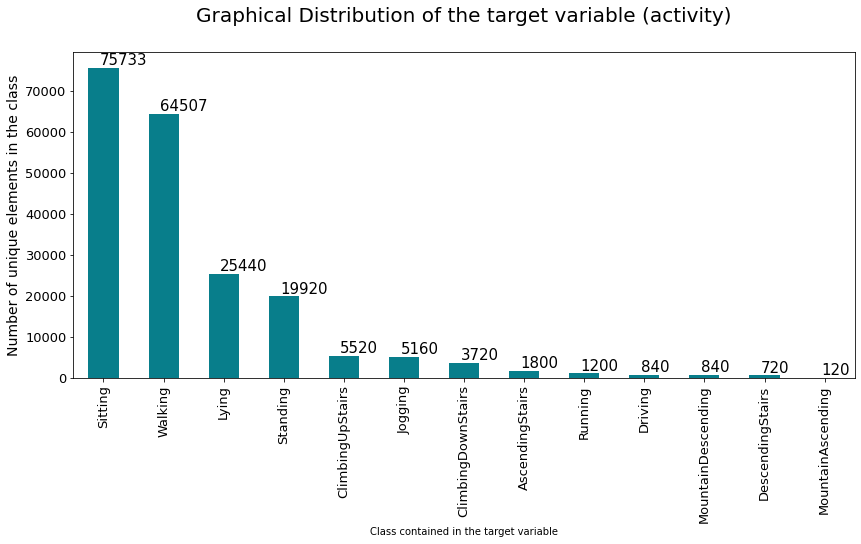

In [10]:
#Let see the graphical distribution of the target variable for a clearer display of the class inbalance that exist in the data

#Express the counts graphically, i.e Graphical Distribution of the target variable (activity)

ax = activity_data['activity'].value_counts().plot(kind='bar', figsize=(14, 6), fontsize=13, color='#087E8B')
ax.set_title('Graphical Distribution of the target variable (activity)', size=20, pad=30)
ax.set_ylabel('Number of unique elements in the class', fontsize=14)
ax.set_xlabel('Class contained in the target variable')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [11]:
activity_data

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205516,205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205517,205518,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,DescendingStairs
205518,205519,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,DescendingStairs


In [14]:
#Before we start, lets see what we have on the Y column
activity_data["activity"]

0                  Sitting
1                  Sitting
2                  Sitting
3                  Sitting
4                  Sitting
                ...       
205515    DescendingStairs
205516    DescendingStairs
205517    DescendingStairs
205518    DescendingStairs
205519    DescendingStairs
Name: activity, Length: 205520, dtype: object

In [15]:
#Let's now encode our  activity variable
from sklearn.preprocessing import StandardScaler, LabelEncoder

#We need the LabelEncoder to encode our class values: bad = 0 and good = 1. 
le= LabelEncoder()

#Lets transform the text characters in the avtivity column to numbers
activity_data['activity'] = le.fit_transform(activity_data['activity'])

In [16]:
#Lets see the converted encoded classes
activity_data

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,10
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,10
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,10
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,10
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,3
205516,205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,3
205517,205518,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,3
205518,205519,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,3


In [21]:
#Or, lets see the first 10

activity_data['activity'].head()

0    10
1    10
2    10
3    10
4    10
Name: activity, dtype: int32

In [20]:
#Lets confirm the encoding
activity_data

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.681510,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,10
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.681510,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,10
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,10
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.681510,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,10
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.681510,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205515,205516,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,3
205516,205517,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,3
205517,205518,286,6,-2,-0.067944,-0.042220,0.617903,-0.383072,-0.804452,10.61110,-0.191598,-1.69443,10.55590,31.2,12.8,-35.6,5000,60.07,3
205518,205519,288,4,-2,-0.066261,-0.039767,0.615725,-0.383072,-1.149220,10.61110,-0.203887,-1.62111,10.47650,31.6,12.4,-35.6,5000,59.40,3


In [21]:
#Lets see the first few values of the target variable
activity_data['activity'][:10]

0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: activity, dtype: int32

In [22]:
y=activity_data['activity']
y

0         10
1         10
2         10
3         10
4         10
          ..
205515     3
205516     3
205517     3
205518     3
205519     3
Name: activity, Length: 205520, dtype: int32

In [23]:
y.shape

(205520,)

In [24]:
X.shape

(205520, 18)

In [25]:
#Let's split our data for training
#75% will be used for training the model while 25% will be used for testing the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [27]:
#Lets see the first 5 columns of the  train data
X_train.head()

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel
96,97,126,-17,2,0.058873,-0.137796,-0.885560,0.153229,2.68151,8.65743,0.153224,2.68151,8.65743,-31.6,-36.4,-38.8,5000,48.68
145616,145617,290,19,1,-0.134534,-0.107498,0.567231,0.229843,-3.79242,10.53450,0.229843,-3.79241,10.53450,11.6,6.0,-5.6,5000,55.44
13772,13773,20,14,2,-0.088133,0.066774,-0.345401,0.612916,-3.21781,12.06680,-0.655593,-2.16966,10.06030,-6.0,22.4,-38.4,10000,62.63
169728,169729,135,9,-10,0.032842,0.142530,-0.914257,-1.685520,-1.53229,8.58082,-1.818470,-2.55616,10.37650,-13.2,-13.6,-36.0,5000,48.29
177273,177274,164,-11,8,-0.064757,-0.111457,-0.982831,1.455670,1.87705,9.04051,1.455620,1.87612,8.97949,-13.2,-32.4,-36.4,5000,42.73


In [28]:
#lets see the first 5 columns of the test data
X_test.head()

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel
37450,37451,160,41,12,0.065376,0.058421,-0.903998,1.149220,-3.524260,3.86903,-2.073910,-0.631910,12.22100,-21.6,-19.2,-38.0,1000,56.37
124415,124416,276,19,-2,-0.124676,-0.115332,0.646752,0.114922,-3.754110,10.57280,0.114922,-3.754110,10.57280,18.0,4.8,-7.2,5000,55.11
88086,88087,182,1,-10,-0.093098,-0.012426,0.995537,-1.877050,-0.268151,9.95988,-1.877050,-0.268151,9.95988,8.0,-21.2,-38.8,5,46.10
160606,160607,109,1,-7,0.078802,0.100940,-0.815957,-1.762130,0.076615,11.91350,-2.376170,-0.743758,9.48087,-24.4,-10.4,-40.8,10000,54.66
32041,32042,255,2,-1,-0.007701,-0.019323,0.794005,0.114922,-0.421380,10.22800,0.114972,-0.409200,10.21040,24.8,-4.4,-56.0,5000,62.35


In [29]:
#Lets scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
#Lets see the scaled train data
X_train

array([[-1.72698363, -0.79028079, -0.88076152, ..., -0.54112324,
        -0.18477442, -0.65042535],
       [ 0.72384379,  1.25083589,  0.72361368, ...,  1.3750691 ,
        -0.18477442,  0.18307463],
       [-1.49665436, -2.10953912,  0.50078379, ..., -0.51803658,
         0.92144055,  1.06959309],
       ...,
       [ 0.49337978,  1.18860672,  0.72361368, ...,  1.30580913,
        -0.18477442,  0.09060052],
       [ 0.74491295,  1.20105255,  0.72361368, ...,  1.3750691 ,
        -0.18477442,  0.0092233 ],
       [ 0.32539907,  1.22594422,  0.67904771, ...,  1.28272248,
        -0.18477442,  0.21883128]])

In [31]:
y_train

96        10
145616    10
13772      1
169728    10
177273    10
          ..
119879    10
103694    12
131932    10
146867    10
121958    10
Name: activity, Length: 154140, dtype: int32

In [32]:
y_train.shape

(154140,)

In [33]:
y_test.shape

(51380,)

In [34]:
#Lets see the scaled test data
X_test

array([[-1.10968783, -0.36479658,  1.70836325, ..., -0.48727035,
        -1.07436504,  0.30353164],
       [ 0.35969501,  1.07809402,  0.72918219, ...,  1.28467314,
        -0.19078484,  0.14739154],
       [-0.25412905, -0.09114492, -0.07196594, ..., -0.53329486,
        -1.29415562, -0.96913411],
       ...,
       [ 0.8073106 ,  1.11541016,  0.72918219, ...,  1.28467314,
        -0.19078484, -0.07566575],
       [-1.54677706, -0.35235787,  0.55114927, ..., -0.67136838,
        -1.29415562, -1.30743767],
       [-0.66431944,  0.34421001, -7.86090615, ...,  1.42274666,
        -0.19078484, -1.33222181]])

In [35]:
y_test

37450      5
124415    10
88086      6
160606    12
32041     11
          ..
54899     12
170601     6
150907    10
11581      6
63809      6
Name: activity, Length: 51380, dtype: int32

In [ ]:
#LETS FIRST BUILD THE KNeighborsClassifier ALGORITHM WITHOUT HANDLING INBALANCE and see the performance, then handle the data
#imbalance

#Lets import the sklearn.neighbors class
from  sklearn.neighbors import KNeighborsClassifier 

#instantiate an object of the KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn_model = knn.fit(X_train, y_train)#trains the classification model
knn_model

y_predict = knn.predict(X_test)
y_predict

In [ ]:
#Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

#Lets see the accuracy of the KNN
print("The accuracy is:", accuracy_score(y_test,y_predict))
print("\n")


#Lets also see the classification report of the KNN
print("Below is the classification report")
print("\n")
report=print(classification_report(y_test,y_predict))
report

#Lets also see the confusion matrix of the KNN
print("\n")
print("Below is the confusion matrix")
pd.crosstab(y_test,y_predict)

In [ ]:
#Lets handle class imbalance

#Lets import the SMOTE module
from imblearn.over_sampling import SMOTE
smote2 = SMOTE()

#Lets handle class imbalance
X_train_smote, y_train_smote=smote2.fit_resample(X_train, y_train)

In [ ]:
X_train_smote

In [ ]:
y_train_smote

In [ ]:
#Lets see the counts after SMOTE
from collections import Counter
print("After SMOTE :" , Counter(y_train_smote))

#REMEMBER THAT THE DATA WAS UNBALANCED INITIALLY.
#The result below shows that all the classes now all equal, each having value of 56819

In [ ]:
#Lets cmpare the predictions
#Lets see the counts after SMOTE
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

#REMEMBER THAT THE DATA WAS UNBALANCED INITIALLY.
#The result below shows that all the classes now all equal, each having value of 56819

In [ ]:
#Lets just have a look at the test data after applying SMOTE
y_train_smote

In [ ]:
X_train_smote

In [ ]:
#LETS NOW BUILD THE KNeighborsClassifier ALGORITHM WITH THE BALANCED CLASS and see the performance

#Lets import the sklearn.neighbors class
from  sklearn.neighbors import KNeighborsClassifier 

#instantiate an object of the KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn_model = knn.fit(X_train_smote, y_train_smote)#trains the classification model
knn_model

y_predict = knn.predict(X_test)
y_predict

In [ ]:
#Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

#Lets see the accuracy of the KNN
print("The accuracy is:", accuracy_score(y_test,y_predict))
print("\n")


#Lets also see the classification report of the KNN
print("Below is the classification report")
print("\n")
report=print(classification_report(y_test,y_predict))
report

#Lets also see the confusion matrix of the KNN
print("\n")
print("Below is the confusion matrix")
pd.crosstab(y_test,y_predict)

#NOTE, The classification report is prepared using the values in the confusion matrix

#Notice that the values in the 'support' column in the classification report are simply the row sums in the confusion 
#matrix. Eg, the sum of the values in the first row of the confusion matrix is 913 +1 +2 = 916; this corresponds to the second 
#value in the 'support' column of the classification report.

In [ ]:
#Notice the difference in the results

In [ ]:
#Lets start bulding our models. We would do parameter tunning for each model then select the best parameters before
#model building

In [ ]:
#NOTE
#The numpy in the next cell below will generate the range of values. for np.arrange(a,b,c), (b-1) number will be generate; for example, for
#np.arrange(1,8,1), 7 values will be generated as shown below

import numpy as np
max=np.arange(1,8,1)
max

In [ ]:
#References
#https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#See downloaded video prof's file names 'Random Forest Hyperparameter tunning' 
#Search for and see prof's python file named 'hyperparameter_tuning_rf'
#see prof's youtube video on https://www.youtube.com/watch?v=jUxhUgkKAjE


#We create a grid search among possible values that your parameters can take 
#and evaluate the results using the right error or score metric

# #RANDOM FOREST CLASSIFIER MODEL BUILDING

# #We begin with the Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

import numpy as np
max_features_range = np.arange(1,4,1)
n_estimators_range = np.arange(10,50,10)             #This represents the number of trees

param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
from sklearn.metrics import accuracy_score
grid.fit(X_train_smote, y_train_smote)

In [ ]:

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
#Dataframe of Grid search parameters and their Accuracy scores
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

In [ ]:
#Preparing data for making contour plots
#Prior to making contour plots, we will have to reshape the data into a compatible format that will be recognized by the contour
#plot functions.
#Firstly, we will be using Pandas' groupby() function to segment the data into groups based on the 2
#hyperparameters: max_features and n_estimators.

grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

In [ ]:
#Pivoting the data
#Data is reshaped by pivoting the data into an m by n matrix where rows and columns correspond to the max_features and
#n_estimators, respectively.

grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [ ]:
#Now, comes the fun part, we will be visualizing the landscape of the 2 hyperparameters that we are tuning and their influence on the accuracy score.

import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


In [ ]:
#3D Surface Plot
#Let's add an extra dimension to the plot and we now have a 3D surface plot. The cool thing about this plot is that you can
#rotate the graph.

import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
#Using the best hyperparameters of max_features': 3, 'n_estimators': 40, we can now build the Random Forest Model


clf = RandomForestClassifier(n_estimators=40, max_features = 3)
rf_model = clf.fit(X_train_smote, y_train_smote)
y_predict_rf=clf.predict(X_test)

In [ ]:
y_test

In [ ]:
#PERFORMANCE ANALYSIS

#Lets see some its the metrics
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

#Lets see the accuracy of the KNN
print("The accuracy for the Random Forest Model is:", accuracy_score(y_test, y_predict_rf))
print("\n")


#Lets also see the classification report of the KNN
print("Below is the classification report for the Random Forest Model")
print("\n")
report=print(classification_report(y_test, y_predict_rf))
report

#Lets also see the confusion matrix of the KNN
print("\n")
print("Below is the confusion matrix for the Random Forest Model")
pd.crosstab(y_test, y_predict_rf)

In [ ]:
##SUPPORT VECTOR MACHINE ALGORITH
from sklearn.svm import SVC
svm=SVC()


#Support Vector Machine is another algorithm
param_grid = {'C':[0.1,1,100,1000],'kernel':['rbf', 'poly', 'sigmoid', 'linear'],'degree':[1,2,3,4,5,6]}


grid = GridSearchCV(svm, param_grid)

grid.fit(X_train_smote, y_train_smote)

print(grid.best_params_)

In [ ]:
#The result for the best hyperparameter for the Support Vector Machine are: rbf, c=10  1

In [ ]:
#Using the best hyperparameters, we can now build the Random Forest Model

In [ ]:
svm_model = svm.fit(X_train_smote, y_train_smote)
predict_svm = svm_model.predict(X_test)               
svm_score = accuracy_score(predict_svm, y_test)

In [ ]:
#Lets see some its the metrics
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

#Lets see the accuracy of the KNN
print("The accuracy for the Support Vecto Machine Model is:", accuracy_score(y_test, predict_svm))
print("\n")


#Lets also see the classification report of the KNN
print("Below is the classification report for the Support Vector Machine Model")
print("\n")
report=print(classification_report(y_test, predict_svm))
report

#Lets also see the confusion matrix of the KNN
print("\n")
print("Below is the confusion matrix for the Support Vector Machine Model")
pd.crosstab(y_test, predict_svm)

In [ ]:
#K- Nearest Neighbours Algorithm

#Lets check for the best hyper parameter for the KNN algorithm

error = []

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

for i in range (1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train_smote)
    predict_knn = knn_model.predict(X_test)               
    error.append(np.mean(predict_knn != y_test))

In [ ]:
#Lets plot a graph of the K VALUE VERSUS THE ERROR TO SETECT THE MINIMUM ERROR

plt.figure(figsize=(12, 8))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate for K values')
plt.xlabel('K value')
plt.ylabel('Mean Error')         

In [ ]:
#From the error rate curve, we can see that the minimum error occurs when n = 8

In [ ]:
#Using the best hyperparameters, we can now build the Random Forest Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn_model = knn.fit(X_train_smote, y_train_smote)
predict_knn = knn_model.predict(X_test)               
knn_score = accuracy_score(predict_knn, y_test)

In [ ]:
#Lets eveluate the model using evaluation metrics

In [ ]:
#Lets see some its the metrics
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

#Lets see the accuracy of the KNN
print("The accuracy for the Support Vecto Machine Model is:", accuracy_score(y_test, predict_knn))
print("\n")


#Lets also see the classification report of the KNN
print("Below is the classification report for the Support Vector Machine Model")
print("\n")
report=print(classification_report(y_test, predict_knn)
report

#Lets also see the confusion matrix of the KNN
print("\n")
print("Below is the confusion matrix for the Support Vector Machine Model")
pd.crosstab(y_test, y_predict_knn)

In [ ]:
#From the results: The Support Vector Machine has the highest acuracy of 9.836 and was choosen as the best model

In [ ]:
X